                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


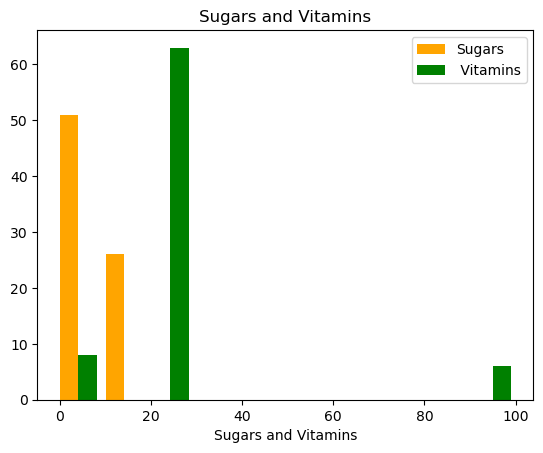

In [8]:

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
df_cereal = pd.read_csv("cereal.csv")

print(df_cereal.head())

plt.hist([df_cereal["sugars"], df_cereal["vitamins"]],

color=['orange', 'green'])

plt.title("Sugars and Vitamins")

plt.xlabel("Sugars and Vitamins")

plt.legend(["Sugars", " Vitamins"])

plt.show()

In [9]:
fmap={'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills',
'P':'Post',
'A':'American Home Foods Products'}

In [10]:
df_cereal['mfr']=df_cereal['mfr'].map(fmap)
df_cereal['mfr']


0             Nabisco
1         Quaker Oats
2            Kelloggs
3            Kelloggs
4     Raslston Purina
           ...       
72      General Mills
73      General Mills
74    Raslston Purina
75      General Mills
76      General Mills
Name: mfr, Length: 77, dtype: object

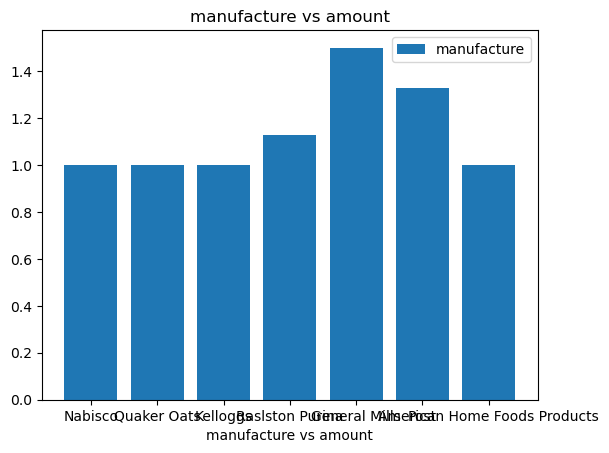

In [14]:
plt.bar(df_cereal['mfr'],df_cereal['cups'])

plt.title("manufacture vs amount")

plt.xlabel("manufacture vs amount")

plt.legend(["manufacture", "amount"])

plt.show()

In [29]:
x=df_cereal.drop(['rating','mfr','name','type'],axis=1)
y=df_cereal['rating']

In [31]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [32]:
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [33]:
y_pred= regressor.predict(x_test)  

In [34]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  

Train Score:  0.9999999999999997
Test Score:  0.9999999999999993


In [35]:
y_test.shape

(57, 12)

In [40]:
y_pred.shape

(20,)

<AxesSubplot:xlabel='rating'>

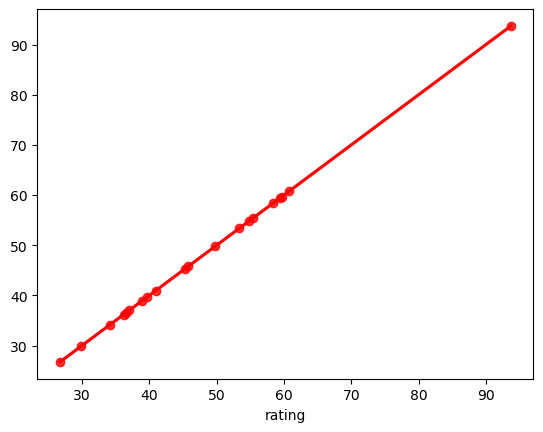

In [41]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')


In [44]:
import sklearn
sklearn.metrics.mean_squared_error(y_test, y_pred,  sample_weight=None, multioutput='uniform_average', squared=True) 

1.4013893365769084e-13

In [45]:
#case study
df=pd.read_csv("FyntraCustomerData.csv")

In [46]:
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [47]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [49]:
df.isnull().sum()


Email                   0
Address                 0
Avatar                  0
Avg_Session_Length      0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly_Amount_Spent     0
dtype: int64

c:\Users\mailt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


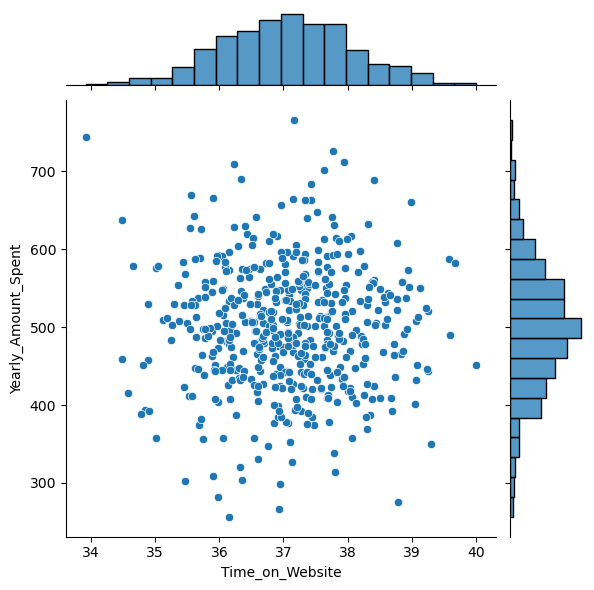

In [50]:
sns.jointplot(df['Time_on_Website'],df['Yearly_Amount_Spent'])

c:\Users\mailt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


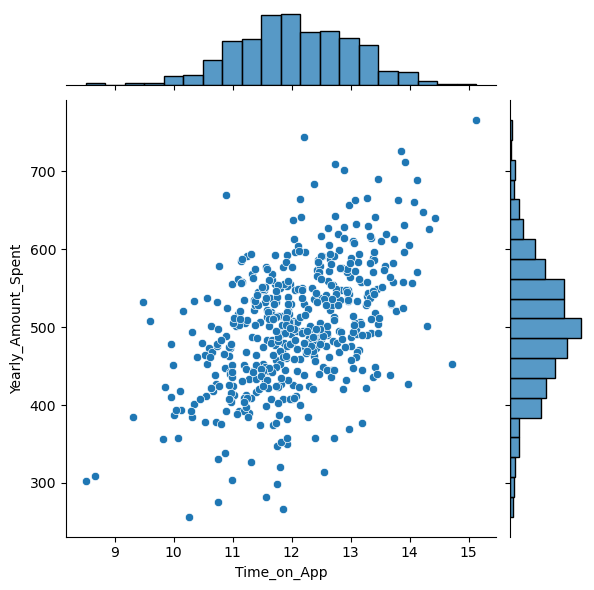

In [51]:
sns.jointplot(df['Time_on_App'],df['Yearly_Amount_Spent'])

In [53]:
df['Time_on_Website'].corr(df['Yearly_Amount_Spent'])

-0.002640844717963287

In [54]:
df['Time_on_App'].corr(df['Yearly_Amount_Spent'])

0.4993277700598346

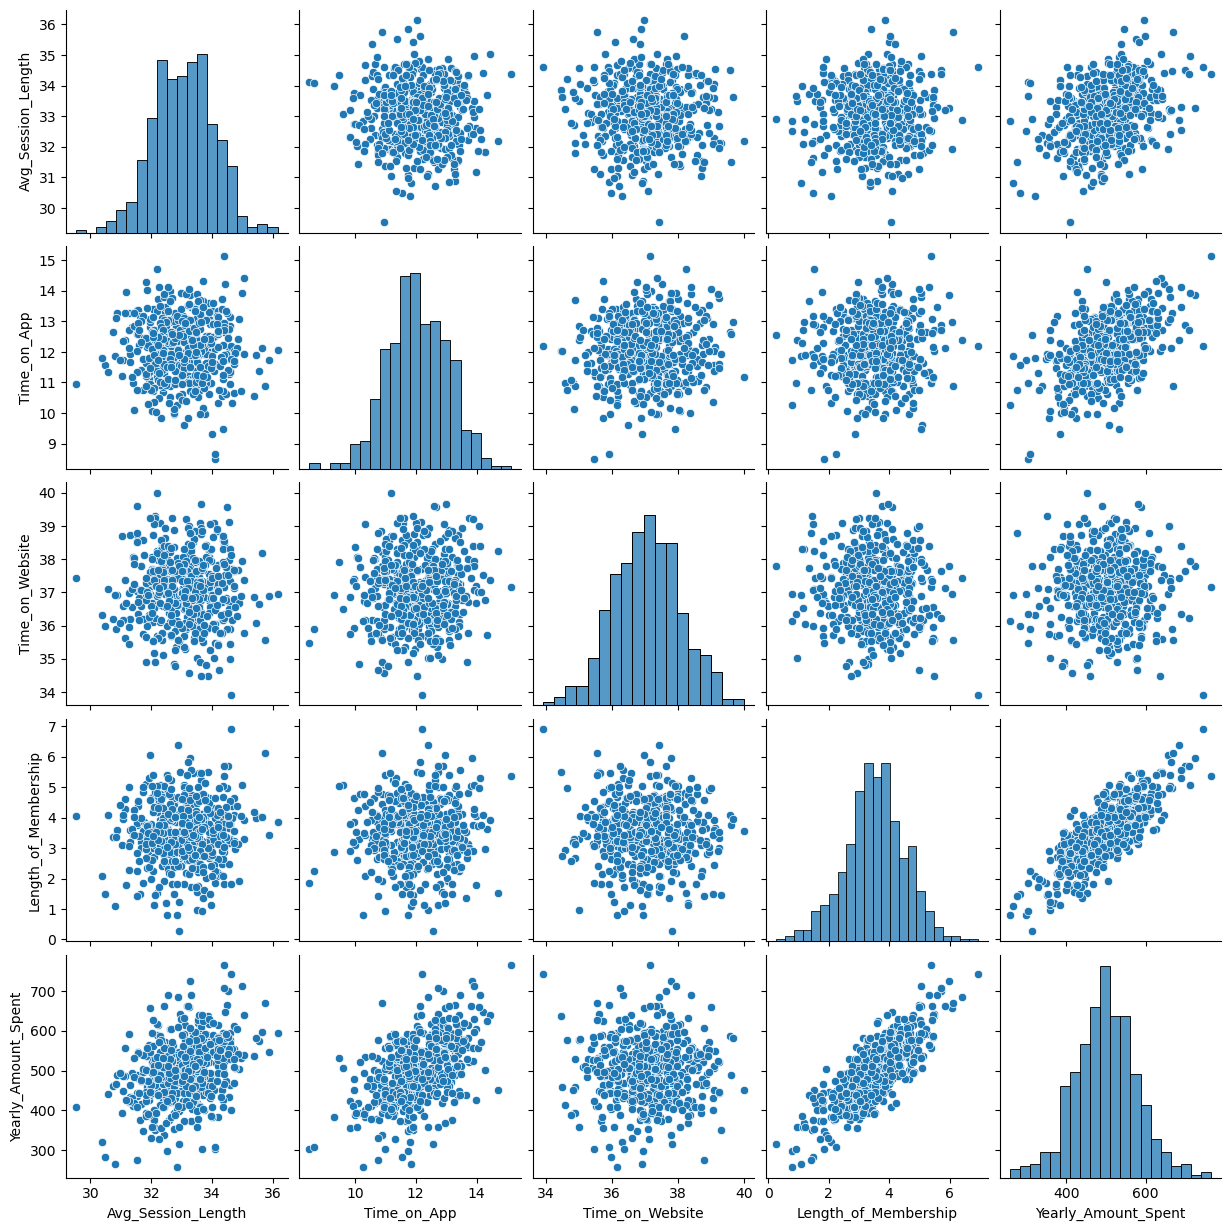

In [55]:
sns.pairplot(df)


In [56]:
df['Length_of_Membership'].corr(df['Yearly_Amount_Spent'])

0.8090835682495691

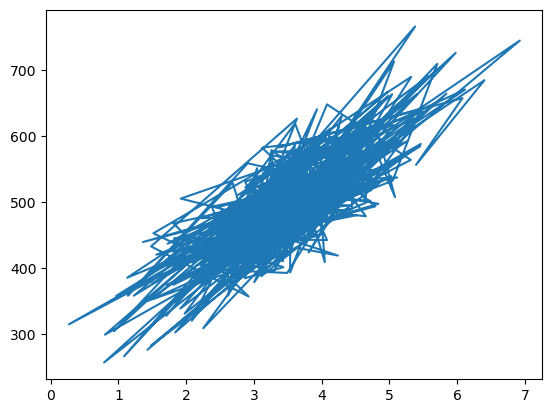

In [57]:
plt.plot(df['Length_of_Membership'],df['Yearly_Amount_Spent'])

In [63]:
x=df.drop(['Email','Address','Yearly_Amount_Spent','Avatar'],axis=1)
y=df['Yearly_Amount_Spent']

In [64]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=85)


In [65]:
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [66]:
y_pred= regressor.predict(x_test)

In [67]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  

Train Score:  0.9856550875864424
Test Score:  0.9786191821901721


<AxesSubplot:xlabel='Yearly_Amount_Spent'>

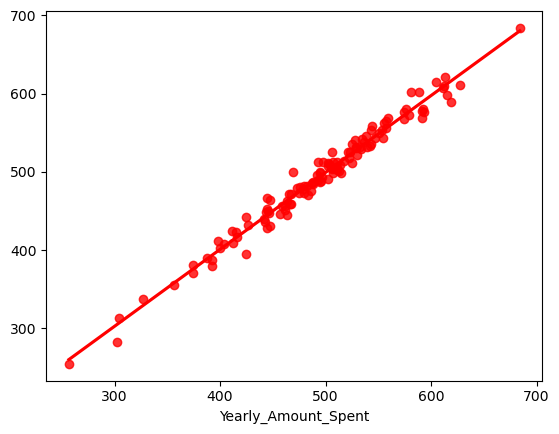

In [68]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

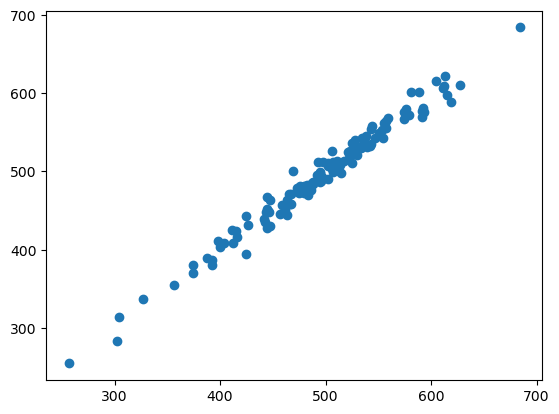

In [69]:
plt.scatter(y_test,y_pred)

In [70]:
sklearn.metrics.mean_squared_error(y_test, y_pred,  sample_weight=None, multioutput='uniform_average', squared=True) 

106.50493151539936